# **Taiwanese Real Estate Valuation - Causal Analysis**
Link: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set
Data was collected from Xindian District, New Tapiei City, Taiwan

# **BLUF**
The results show that distance to the nearest MRT station is the most important factor influencing house prices, with closer proximity corresponding to higher prices. However, the analysis exhibits uncertainty around the precise impacts of other factors like number of convenience stores, latitude, and longitude on house prices based on the confidence intervals. The learning curve indicates the model is fitting the data well without significant bias or variance issues.



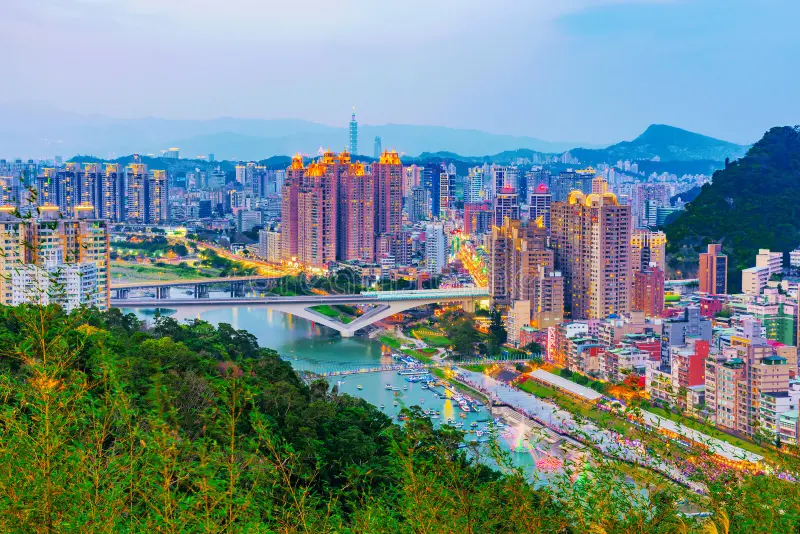
```
# This is formatted as code
```



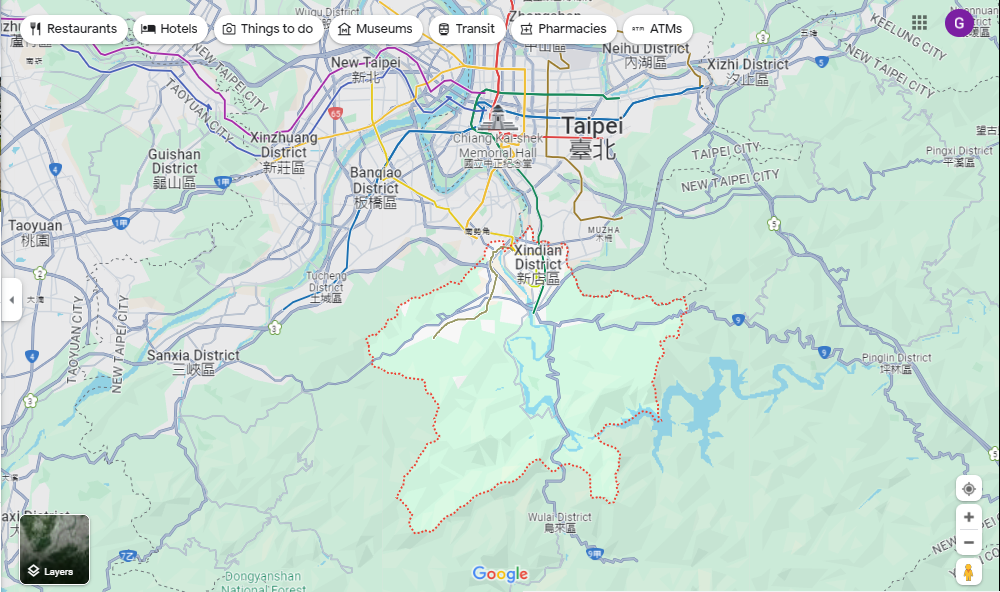

#Libraries

In [ ]:
!pip install econml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 24.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

# Data

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

# metadata
print(real_estate_valuation.metadata)

# variable information
print(real_estate_valuation.variables)


{'uci_id': 477, 'name': 'Real Estate Valuation', 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv', 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 414, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y house price of unit area'], 'index_col': ['No'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5J30W', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Building real estate valuation models with comparative approach through case-based reasoning', 'authors': 'I. Yeh, Tzu-Kuang Hsu', 'published_

# Exploratory Data Analysis

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [ ]:
X.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


In [ ]:
X.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64

# Data Preprocessing

In [ ]:
y.describe()

,Y house price of unit area
count,414.000000
mean,37.980193
std,13.606488
min,7.600000
25%,27.700000
50%,38.450000
75%,46.600000
max,117.500000


In [ ]:
X.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

# Splitting Data

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Reset index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Check the size of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((331, 6), (83, 6), (331, 1), (83, 1))

#**Correlation Analysis**

#*Correlation Heatmap*

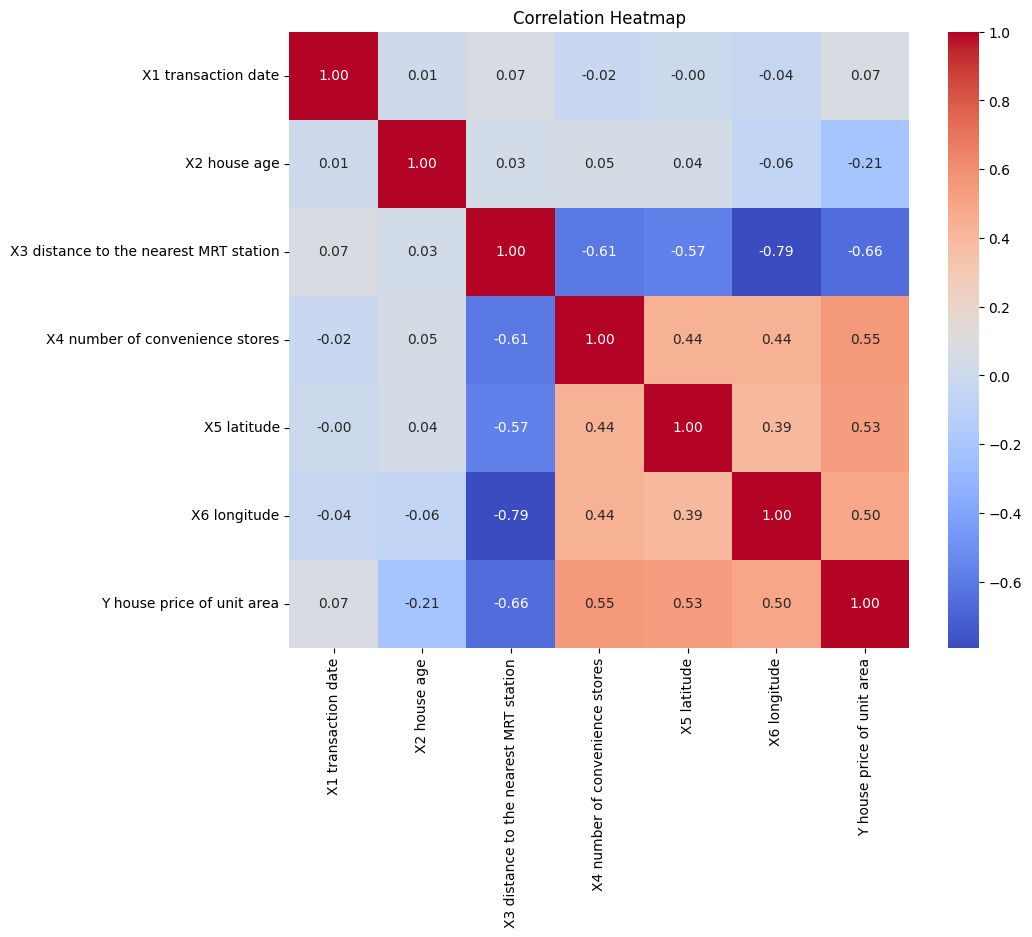

In [ ]:
# Correlation Heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Concatenate the dataframes
data = pd.concat([X_train, y_train], axis=1)

corr_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Set the figure size for the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

#*Build a Random Forest Regressor to get variable importance*


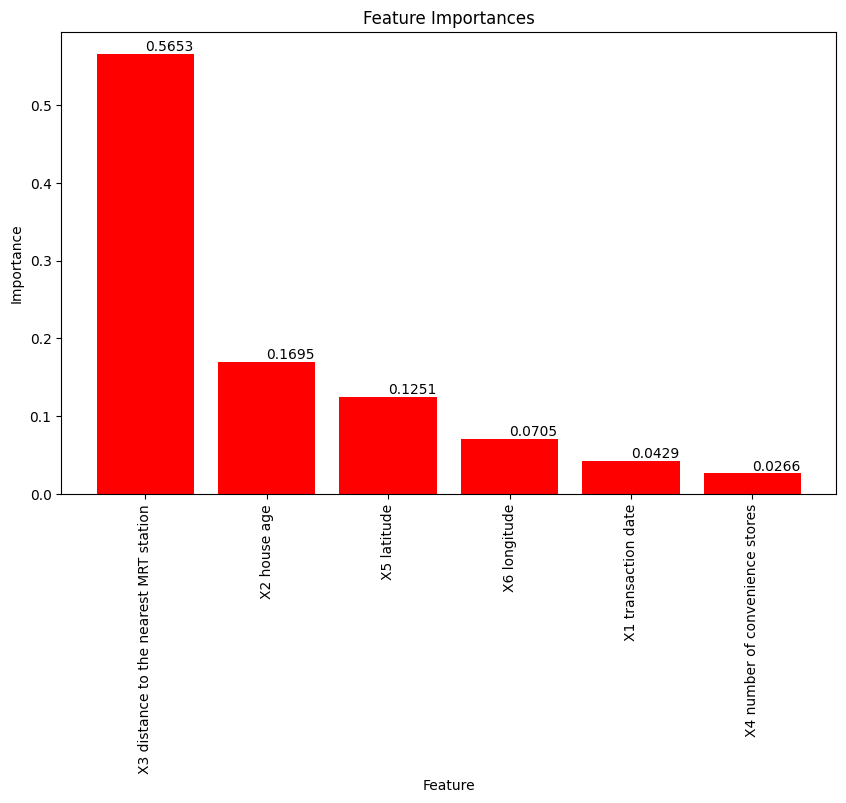

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming X_train_scaled and y_train are defined and prepared elsewhere in your code
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, np.ravel(y_train))

# Get the feature importances from the model
importances = model.feature_importances_

# Sorting the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a plot
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')

# Create bar plot
bars = plt.bar(range(X_train_scaled.shape[1]), importances[indices], color='r', align='center')

# Add labels and title
plt.xticks(range(X_train_scaled.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')

# Annotate the bars with the actual importance values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom')  # va: vertical alignment




# Learning Curve

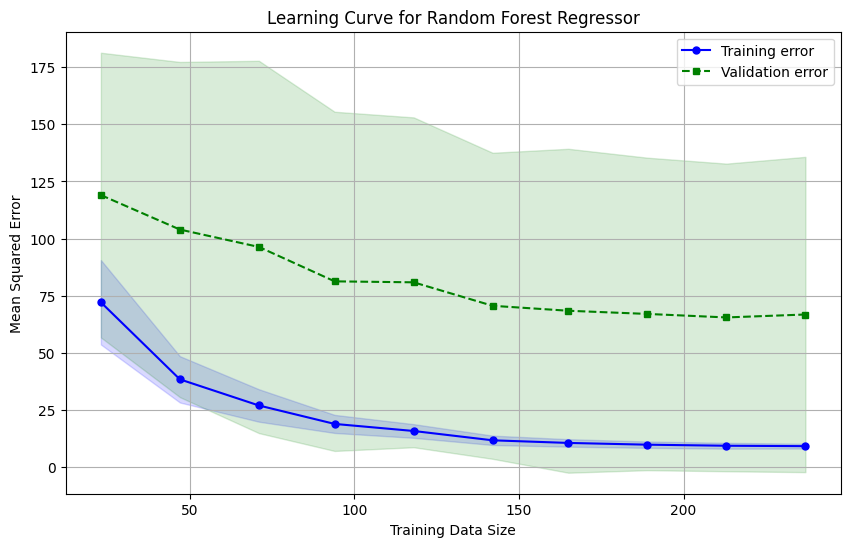

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Check the lengths of X_train_scaled and y_train
if len(X_train_scaled) != len(y_train):
    # Option 1: Filter the data to match lengths
    X_train_scaled, y_train = X_train_scaled[y_train.index], y_train[y_train.index]
    # Option 2: Pad the smaller array (e.g., pad y_train)
    y_train = np.pad(y_train, (0, len(X_train_scaled) - len(y_train)), mode='constant')

# Fit the RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_rf, X=X_train_scaled, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_mean, color='blue', marker='o', markersize=5, label='Training error')
plt.fill_between(train_sizes, -train_mean + train_std, -train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, -test_mean, color='green', marker='s', linestyle='--', markersize=5, label='Validation error')
plt.fill_between(train_sizes, -test_mean + test_std, -test_mean - test_std, alpha=0.15, color='green')

plt.title('Learning Curve for Random Forest Regressor')
plt.xlabel('Training Data Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#**Causal Analysis**

##*First Analyze ATE of X3 (distance to metro) on Y*

In [ ]:
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from econml.inference import StatsModelsInference

# Defining features and target
X = data.drop(['Y house price of unit area', 'X3 distance to the nearest MRT station'], axis=1)
y = data['Y house price of unit area']
T = data['X3 distance to the nearest MRT station']  # Treatment assignment

# Split the data into training and testing sets for better generalization
X_train, X_test, T_train, T_test, y_train, y_test = train_test_split(X, T, y, test_size=0.2, random_state=123)

# Initialize the model with Gradient Boosting for the outcome and treatment models
# and specify Linear Regression for the final stage of estimation.
model = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123, cv = 6)

# Fit the model
model.fit(y, T, X=X, inference='statsmodels')

# Obtain the ATE estimate and its 95% confidence interval
ate_estimate = model.ate(X)
ate_confidence_interval = model.ate_interval(X, alpha=0.05)

# Print the ATE and confidence interval
print("ATE Estimate for X3 (distance to metro):", ate_estimate)
print("95% Confidence Interval:", ate_confidence_interval)


ATE Estimate for X3 (distance to metro): -0.008344866710780366
95% Confidence Interval: (-0.019162598028118948, 0.0024728646065579132)


##*ATE for X4 (distance of convenience stores)*

In [ ]:
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from econml.inference import StatsModelsInference

# Defining features and target
X2 = data.drop(['Y house price of unit area', 'X4 number of convenience stores'], axis=1)
y = data['Y house price of unit area']
T2 = data['X4 number of convenience stores']  # Treatment assignment

# Split the data into training and testing sets for better generalization
X_train_2, X_test_2, T_train_2, T_test_2, y_train_2, y_test_2 = train_test_split(X2, T2, y, test_size=0.2, random_state=123)


# Initialize the model with Gradient Boosting for the outcome and treatment models
# and specify Linear Regression for the final stage of estimation.
model_2 = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123, cv = 6)

# Fit the model
model_2.fit(y, T2, X=X2, inference='statsmodels')

# Obtain the ATE estimate and its 95% confidence interval
ate_estimate_2 = model.ate(X2)
ate_confidence_interval_2 = model.ate_interval(X2, alpha=0.05)

# Print the ATE and confidence interval
print("ATE Estimate for X4 (number of convenience stores):", ate_estimate_2)
print("95% Confidence Interval:", ate_confidence_interval_2)

ATE Estimate for X4 (number of convenience stores): 1.3628302621566741
95% Confidence Interval: (-3.025729636038191, 5.751390160351538)


##*ATE for X5: Latitude*

In [ ]:
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from econml.inference import StatsModelsInference

# Defining features and target
X3 = data.drop(['Y house price of unit area', 'X5 latitude'], axis=1)
y = data['Y house price of unit area']
T3 = data['X5 latitude']  # Treatment assignment

# Split the data into training and testing sets for better generalization
X_train_3, X_test_3, T_train_3, T_test_3, y_train_3, y_test_3 = train_test_split(X3, T3, y, test_size=0.2, random_state=123)
# Initialize the model with Gradient Boosting for the outcome and treatment models
# and specify Linear Regression for the final stage of estimation.
model_3 = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123, cv = 6)

# Fit the model
model_3.fit(y, T3, X=X3, inference='statsmodels')

# Obtain the ATE estimate and its 95% confidence interval
ate_estimate_3 = model.ate(X3)
ate_confidence_interval_3 = model.ate_interval(X3, alpha=0.05)

# Print the ATE and confidence interval
print("ATE Estimate for X5 (latitude):", ate_estimate_3)
print("95% Confidence Interval:", ate_confidence_interval_3)

ATE Estimate for X5 (latitude): 5.758985391066386
95% Confidence Interval: (-0.345216147105341, 11.863186929238111)


##*ATE for X6: Longitude*

In [ ]:
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from econml.inference import StatsModelsInference

# Defining features and target
X4 = data.drop(['Y house price of unit area', 'X6 longitude'], axis=1)
y = data['Y house price of unit area']
T4 = data['X6 longitude']  # Treatment assignment

# Split the data into training and testing sets for better generalization
X_train_4, X_test_4, T_train_4, T_test_4, y_train_, y_test_4 = train_test_split(X4, T4, y, test_size=0.2, random_state=123)

# Initialize the model with Gradient Boosting for the outcome and treatment models
# and specify Linear Regression for the final stage of estimation.
model_4 = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123, cv = 6)

# Fit the model
model_4.fit(y, T4, X=X4, inference='statsmodels')

# Obtain the ATE estimate and its 95% confidence interval
ate_estimate_4 = model.ate(X4)
ate_confidence_interval_4 = model.ate_interval(X4, alpha=0.05)

# Print the ATE and confidence interval
print("ATE Estimate for X6 longitude:", ate_estimate_4)
print("95% Confidence Interval:", ate_confidence_interval_4)

ATE Estimate for X6 longitude: 13.605065253254434
95% Confidence Interval: (-10.753780854061421, 37.96391136057028)


##*ATE Table*

In [ ]:
from econml.dml import LinearDML
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Assuming 'data' is your DataFrame after all preprocessing steps

# List of predictors you want to analyze as treatments
predictors = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# The target variable
outcome = 'Y house price of unit area'

# Dictionary to store ATE and Confidence Intervals
ate_results = {}

for predictor in predictors:
    # Define the feature matrix X, the target y, and the treatment T
    X = data.drop([outcome, predictor], axis=1)  # Drop the outcome and the current treatment
    y = data[outcome]
    T = data[predictor]  # Current Treatment

    # Initialize the model
    model_dml = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123)

    # Fit the model
    model_dml.fit(Y=y, T=T, X=X, W=None, inference='statsmodels')

    # Obtain the average treatment effect (ATE) and its confidence interval
    ate = model_dml.ate(X=X)
    ate_ci = model_dml.ate_interval(X=X, alpha=0.05)

    # Store results
    ate_results[predictor] = {"ATE": ate, "95% CI": ate_ci}

# Convert results to DataFrame for better visualization
ate_df = pd.DataFrame(ate_results).T
ate_df


,ATE,95% CI
X1 transaction date,5.491405,"(2.55170865592125, 8.431101534269331)"
X2 house age,-0.16466,"(-0.25839979326930473, -0.07091955903476321)"
X3 distance to the nearest MRT station,-0.006119,"(-0.015347239777807158, 0.0031085585885513413)"
X4 number of convenience stores,-0.282869,"(-1.2197448940125781, 0.6540059428349001)"
X5 latitude,288.10653,"(142.00931583283156, 434.2037450352585)"
X6 longitude,67.426724,"(-303.39596035899785, 438.24940906244365)"


# Analysis

### Correlation Matrix
Based on the correlation matrix, it shows that house price (Y) has a negative correlation between house age (X2) and distance to MRT station (X3) and a positive correlation with the number of convenience stores (X4). This indicates that the typical expectations in real estate where newer houses, those closer to transportation hubs, and those in areas with more amenities tend to command higher prices.
- **House Age vs House Price:** There is a moderate to strong negative correlation that suggests that as houses get older, their unit price tends to decrease.
- **Distance to Nearest MRT Station vs House Price:** There is a moderate to strong negative correlation which implies that houses closer to MRT stations tend to have higher unit prices.
- **Number of Convenience Stores vs House Price:** There is a positive correlation which indicates that areas with more convenience stores tend to have higher property prices.
- **Longitude and Latitude vs House Price:** These correlations are weak against House Price which indicates that longitude and latitude does not matter in terms of house price.

The house price is higher if there are more convenient stores, higher latitude and longitude, and a shorter distance to the nearest MRT station.

Since we need to make the variables uncorrelated to make a prediction, and the variable “number of convenience stores” is highly correlated with the other three variables (latitude, longitude, and distance), we think it is better to drop the variable “number of convenience stores”

### Feature Importance Explanation

Based on the feature importance, it shows that the most important variable in house prices in Taiwan is the distance to the nearest MRT station. This feature has a much higher importance at 0.565 compared to the other variables. The second most important feature is house age in predicting house prices in Taiwan at 0.1695. It also shows that latitude and longitude have some feature importance in house price which is not shown in the correlation matrix or the ATE estimate.

### ATE Explanation

#### **ATE for X3: Distance to the Nearest MRT Station**
The ATE estimate for distance to metro station shows that the distance to the nearest metro station is about -0.006119. This suggests that for each unit increase in the distance to the metro station, the house price of unit area decreases by approximately 0.006119 on average.

The 95% confidence interval for the ATE estimate is (-0.0153, 0.0031) which is the range of plausible values for the true ATE. Since the interval includes both positive and negative values, it indicates uncertainty about the direction and magnitude of the effect. In this case, we cannot be confident about whether the distance to the metro station has a significant effect on the house price of unit area.

#### **ATE for X4: Number of Convenience Stores**
ATE Estimate for the number of convenience stores represents the number of convenience stores is approximately -0.282, implying on average, an decrease in the number of convenience stores is associated with an decrease of approximately 0.282 units in the house price of unit area.

The 95% confidence interval for the ATE estimate is (-1.219, 0.654) which are the plausible values for the true ATE. Since the interval includes both positive and negative values, it indicates uncertainty about the direction and magnitude of the effect. In this case, we cannot be highly confident about the precise impact of the number of convenience stores on the house price of unit area.

#### **ATE for X5: Latitude**
The ATE estimate for the variable X5, which represents the latitude, is approximately 288.106. This means that, on average, an increase in the latitude is associated with an increase of approximately 288.106 units in the house price of unit area.

The 95% confidence interval for the ATE estimate is (142.009, 434.2037).

#### **ATE for X6: Longitude**
The ATE estimate for the variable X6, which represents longitude, is approximately 67.42. This suggests that, on average, an increase in longitude is associated with an increase of approximately 67.42 units in the house price of unit area.

The 95% confidence interval for the ATE estimate is (-303.395, 438.249). Since the interval includes both positive and negative values, it indicates uncertainty about the precise impact of longitude on house prices.

### Learning Curve

The learning curve for the Random Forest Regressor shows:

- Training error remains consistently low across different sizes of training data, which indicates that the model fits the training data well.

- Validation error decreases as more data is used, which suggests that the model generalizes well to new data as it learns from a larger dataset. The convergence of training and validation errors also indicates a good balance between bias and variance, suggesting the model is neither underfitting nor overfitting significantly.